In [36]:
# Import necessary libraries
import pandas as pd
import tensorflow as tf
from keras.applications.resnet_v2 import ResNet50V2
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
import matplotlib.pyplot as plt

# Comment: Importing the required libraries for data manipulation, deep learning, and data visualization.

In [37]:
# Define paths to the training and test datasets
# Comment: Setting the paths to the directories containing the training and test images.
train_path = r"C:\Users\cannu\Desktop\dog-breed-identification\train"
test_path = r"C:\Users\cannu\Desktop\dog-breed-identification\test"

# Read dataset labels from CSV files
# Comment: Loading the labels for the training dataset from 'labels.csv' and for the test dataset from 'sample_submission.csv'.
train_labels = pd.read_csv(r"C:\Users\cannu\Desktop\dog-breed-identification\labels.csv")
test_labels = pd.read_csv(r"C:\Users\cannu\Desktop\dog-breed-identification\sample_submission.csv")

In [38]:
# Display the first 20 rows of the train_labels DataFrame
# Comment: This line of code is used to show the first 20 rows of the DataFrame 'train_labels'.
# It provides a snapshot of the data, allowing us to examine the structure and content of the DataFrame.
train_labels.head(20)

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
5,002211c81b498ef88e1b40b9abf84e1d,bedlington_terrier
6,00290d3e1fdd27226ba27a8ce248ce85,bedlington_terrier
7,002a283a315af96eaea0e28e7163b21b,borzoi
8,003df8b8a8b05244b1d920bb6cf451f9,basenji
9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound


In [39]:
# Display the first 20 rows of the test_labels DataFrame
# Comment: This line of code is used to show the first 20 rows of the DataFrame 'test_labels'.
# It provides a glimpse of the structure and content of the DataFrame, allowing us to understand the data it contains.
test_labels.head(20)

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
4,001a5f3114548acdefa3d4da05474c2e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
5,00225dcd3e4d2410dd53239f95c0352f,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
6,002c2a3117c2193b4d26400ce431eebd,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
7,002c58d413a521ae8d1a5daeb35fc803,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
8,002f80396f1e3db687c5932d7978b196,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
9,0036c6bcec6031be9e62a257b1c3c442,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333


In [40]:
# Add ".jpg" extension to the 'id' column in train_labels DataFrame
train_labels['id'] = train_labels['id'].apply(lambda x: x + ".jpg")

# Comment: This line of code appends the ".jpg" extension to the 'id' column in the train_labels DataFrame.
# It is a common practice in image-related tasks to have file extensions included in the 'id' column for image file identification.

# Add ".jpg" extension to the 'id' column in test_labels DataFrame
test_labels['id'] = test_labels['id'].apply(lambda x: x + ".jpg")

# Comment: Similar to the previous line, this one adds the ".jpg" extension to the 'id' column in the test_labels DataFrame.
# This modification is often done to match the format of file names typically associated with image files.


In [41]:
# Get unique values in the 'breed' column of train_labels
# Comment: This line retrieves the unique values in the 'breed' column of the train_labels DataFrame.
x = train_labels.breed.unique()

# Define a list of breeds to include
# Comment: The 'include' list specifies the dog breeds that you want to keep in the train_labels DataFrame.
include = ['beagle', 'chihuahua', 'doberman','french_bulldog', 'golden_retriever', 'malamute', 'pug', 'saint_bernard', 'scottish_deerhound','tibetan_mastiff']

# Iterate through unique breeds in train_labels and remove those not in the 'include' list
# Comment: This loop iterates through the unique breeds in the train_labels DataFrame.
# If a breed is not in the 'include' list, it removes all rows corresponding to that breed from the DataFrame.
for i in x:
    if i not in include:
        train_labels = train_labels.drop(train_labels[train_labels['breed'] == i].index)

# Print the shape of the modified train_labels DataFrame
# Comment: Displaying the shape of the train_labels DataFrame after filtering, showing the number of rows and columns.
print(train_labels.shape)

# Display the first few rows of the modified train_labels DataFrame
# Comment: Showing the first few rows of the modified train_labels DataFrame to inspect the changes.
train_labels.head()




(841, 2)


,id,breed
4,0021f9ceb3235effd7fcde7f7538ed62.jpg,golden_retriever
9,0042188c895a2f14ef64a918ed9c7b64.jpg,scottish_deerhound
20,008b1271ed1addaccf93783b39deab45.jpg,doberman
25,00a366d4b4a9bbb6c8a63126697b7656.jpg,golden_retriever
37,0100f55e4f0fe28f2c0465d3fc4b9897.jpg,golden_retriever


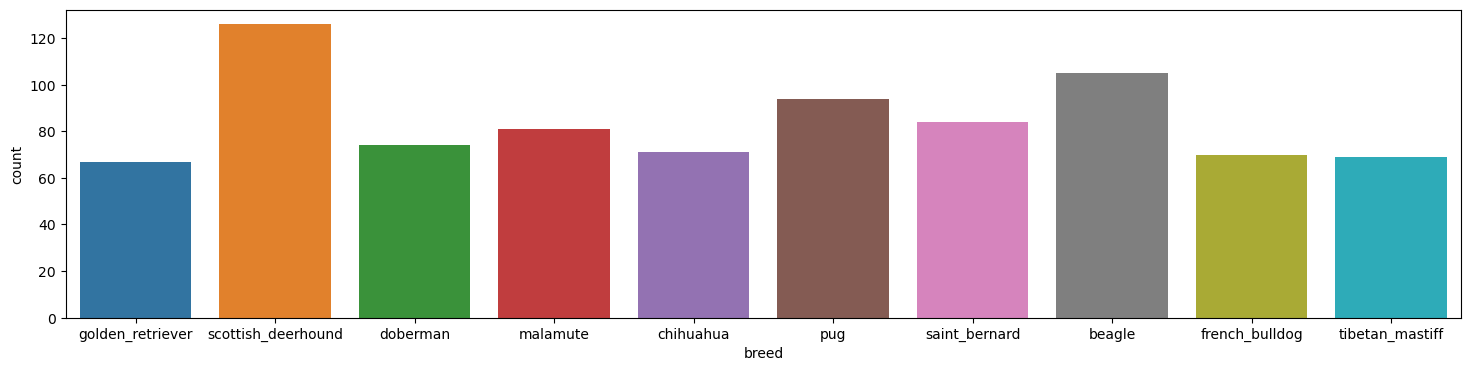

In [42]:
# Set the size of the figure for better visibility
plt.figure(figsize=(18, 4))

# Create a count plot using seaborn to visualize the distribution of dog breeds
cp = sns.countplot(x='breed', data=train_labels)

# Comment: This line creates a count plot using seaborn (sns).
# The x-axis represents the 'breed' column in the train_labels DataFrame, and the y-axis shows the count of occurrences for each breed.

In [43]:
# Create an ImageDataGenerator for data augmentation during training
train_datagen = ImageDataGenerator(
    rescale=1./255,                   # Rescale pixel values to be in the range [0, 1]
    validation_split=0.2,             # Split the data into training and validation sets (80% training, 20% validation)
    shear_range=0.2,                  # Apply random shear transformations
    zoom_range=0.2,                   # Apply random zoom transformations
    horizontal_flip=True,             # Flip images horizontally
    width_shift_range=0.2,            # Apply random width shifts
    height_shift_range=0.2,           # Apply random height shifts
    rotation_range=20,                # Apply random rotations
    brightness_range=[0.2, 1.0]       # Adjust the brightness of the images
)

# Create a flow of data from the training dataset using the ImageDataGenerator
train_set = train_datagen.flow_from_dataframe(
    dataframe=train_labels,           # Input DataFrame containing file paths and labels
    directory=train_path,             # Directory where the images are stored
    x_col="id",                       # Column in the DataFrame containing the file names
    y_col="breed",                    # Column in the DataFrame containing the labels
    batch_size=16,                    # Number of samples in each batch
    subset="training",                # Subset of the data (in this case, the training set)
    class_mode="categorical",         # Type of labels (categorical for multiple classes)
    target_size=(224, 224),           # Size of the images after resizing
    seed=42,                          # Seed for reproducibility
    shuffle=True                      # Shuffle the data in each epoch
)

# Comment: Setting up an ImageDataGenerator for data augmentation during training, and creating a flow of data from the training dataset.
# The flow of data is used to feed batches of augmented images to the neural network during training.


Found 673 validated image filenames belonging to 10 classes.


In [44]:
# Create a flow of data from the validation subset of the training dataset using the ImageDataGenerator
validate_set = train_datagen.flow_from_dataframe(
    dataframe=train_labels,           # Input DataFrame containing file paths and labels
    directory=train_path,             # Directory where the images are stored
    x_col="id",                       # Column in the DataFrame containing the file names
    y_col="breed",                    # Column in the DataFrame containing the labels
    batch_size=16,                    # Number of samples in each batch
    subset="validation",              # Subset of the data (in this case, the validation set)
    class_mode="categorical",         # Type of labels (categorical for multiple classes)
    target_size=(224, 224),            # Size of the images after resizing
    seed=42,                          # Seed for reproducibility
    shuffle=True                      # Shuffle the data in each epoch
)

# Comment: Creating a flow of data from the validation subset of the training dataset using the same ImageDataGenerator.
# This validation set will be used to evaluate the model's performance during training.


Found 168 validated image filenames belonging to 10 classes.


In [45]:
# Create an ImageDataGenerator for rescaling pixel values in the test dataset
test_datagen = ImageDataGenerator(rescale=1./255)

# Comment: This line sets up an ImageDataGenerator for the test dataset, rescaling pixel values to be in the range [0, 1].

# Create a flow of data from the test dataset using the ImageDataGenerator
test_set = test_datagen.flow_from_dataframe(
    dataframe=test_labels,            # Input DataFrame containing file paths
    directory=test_path,              # Directory where the test images are stored
    x_col="id",                       # Column in the DataFrame containing the file names
    y_col=None,                       # No labels for the test set
    batch_size=16,                    # Number of samples in each batch
    class_mode=None,                  # No class mode as there are no labels for the test set
    seed=42,                          # Seed for reproducibility
    shuffle=False,                    # Do not shuffle the data as it's for testing
    target_size=(224, 224)             # Size of the images after resizing
)

# Comment: Creating a flow of data from the test dataset using the previously defined ImageDataGenerator.
# This test set will be used to evaluate the model's performance on unseen data.


Found 10357 validated image filenames.


In [46]:
# Access the batch size of the training data generator
train_set.batch_size

# Comment: This code retrieves the batch size specified for the training data generator 'train_set'.
# The batch size represents the number of samples that will be processed in each iteration during training.
# In this case, the batch size is set to 16, meaning that the model will be updated based on gradients calculated from 16 samples at a time.


16

In [48]:
# Initialize a ResNet50V2 model with specific configuration
resnet = ResNet50V2(
    input_shape=[224, 224, 3],  # Shape of the input images (height, width, channels)
    weights='imagenet',          # Initialize the model with pre-trained weights on ImageNet
    include_top=False            # Exclude the fully-connected layer at the top of the network
)

# Comment: This line of code initializes a ResNet50V2 model using Keras.
# - 'input_shape' specifies the shape of the input images (224 pixels in height, 224 pixels in width, and 3 channels for RGB color).
# - 'weights' is set to 'imagenet' to use pre-trained weights on the ImageNet dataset.
# - 'include_top' is set to False to exclude the fully-connected layer at the top of the network, which is often replaced in transfer learning scenarios.


In [21]:
# Set all layers of the ResNet50V2 model to be non-trainable
for layer in resnet.layers:
    layer.trainable = False

# Comment: This loop iterates through all layers of the ResNet50V2 model and sets them to be non-trainable.
# By freezing the layers, we prevent the weights from being updated during the training of the subsequent layers.

# Flatten the output of the ResNet50V2 model
x = keras.layers.Flatten()(resnet.output)

# Comment: Adding a Flatten layer to convert the output of the ResNet50V2 model into a one-dimensional vector.

# Apply dropout to reduce overfitting
x = keras.layers.Dropout(0.4)(x)

# Comment: Adding a Dropout layer with a dropout rate of 0.4 to reduce overfitting during training.

# Create the final dense layer for classification with softmax activation
pred = keras.layers.Dense(10, activation='softmax')(x)

# Comment: Adding a Dense layer with 10 units (assuming it's a classification task with 10 classes) and softmax activation for the final output.

# Create the final model using the ResNet50V2 as the base and the modified output layers
model = tf.keras.models.Model(inputs=resnet.input, outputs=pred)

# Comment: Creating the final model by specifying the input (ResNet50V2 input) and output (the modified layers).

# Configure the optimizer, loss function, and metrics for model compilation
opt = tf.keras.optimizers.Adam(learning_rate=1e-5)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Comment: Configuring the model for training by specifying the optimizer (Adam with a learning rate of 1e-5),
# the loss function (categorical crossentropy for multi-class classification), and evaluation metric (accuracy).

# Determine the number of training and validation steps per epoch
train_step = train_set.n // train_set.batch_size
validate_step = validate_set.n // validate_set.batch_size

# Train the model using the training and validation datasets
resnet50 = model.fit(
    train_set,
    validation_data=validate_set,
    epochs=30,
    steps_per_epoch=train_step,
    validation_steps=validate_step
)

# Comment: Training the model on the specified number of epochs using the training and validation datasets.
# The steps_per_epoch and validation_steps are specified to ensure that the model processes the entire dataset in each epoch.


Epoch 1/30


42/42 [==============================] - 37s 806ms/step - loss: 5.8513 - accuracy: 0.1385 - val_loss: 3.7892 - val_accuracy: 0.2188
Epoch 2/30
42/42 [==============================] - 31s 745ms/step - loss: 4.2850 - accuracy: 0.2496 - val_loss: 2.8066 - val_accuracy: 0.3187
Epoch 3/30
42/42 [==============================] - 33s 782ms/step - loss: 3.2174 - accuracy: 0.3790 - val_loss: 2.0017 - val_accuracy: 0.4875
Epoch 4/30
42/42 [==============================] - 33s 778ms/step - loss: 2.6797 - accuracy: 0.4444 - val_loss: 1.7442 - val_accuracy: 0.5938
Epoch 5/30
42/42 [==============================] - 32s 748ms/step - loss: 2.1485 - accuracy: 0.5449 - val_loss: 1.1830 - val_accuracy: 0.6625
Epoch 6/30
42/42 [==============================] - 32s 768ms/step - loss: 1.8929 - accuracy: 0.5814 - val_loss: 1.0484 - val_accuracy: 0.7000
Epoch 7/30
42/42 [==============================] - 33s 788ms/step - loss: 1.5198 - accuracy: 0.6621 - val_loss: 1.1139 - val_accuracy: 0.70

In [31]:
# Calculate the number of steps needed for the entire test set
STEP_SIZE_TEST = (test_set.n + test_set.batch_size - 1) // test_set.batch_size

# Comment: Calculating the number of steps required to process the entire test set based on the batch size.

# Reset the test set generator to its initial state
test_set.reset()

# Comment: Resetting the test set generator to its initial state to start iterating over the test set from the beginning.

# Use the trained model to predict labels for the test set
pred = model.predict(test_set, steps=STEP_SIZE_TEST, verbose=1)

# Comment: Using the trained model to predict labels for the test set.
# The 'steps' parameter ensures that the model processes the entire test set by iterating over it in batches.
# The 'verbose' parameter controls the verbosity of the prediction process, and here it's set to 1 for progress updates.


648/648 [==============================] - 381s 587ms/step


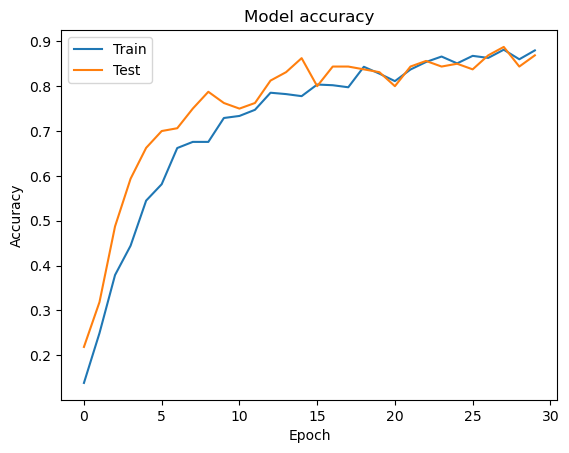

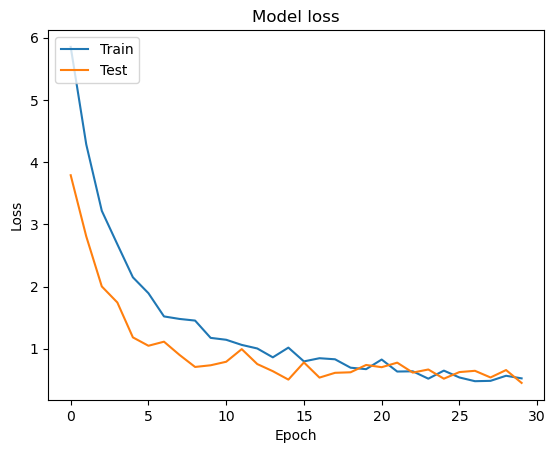

In [32]:
# Plotting the training and validation accuracy over epochs
plt.plot(resnet50.history['accuracy'])
plt.plot(resnet50.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Comment: This block of code generates a plot showing the training and validation accuracy over epochs.
# The 'accuracy' and 'val_accuracy' values are obtained from the training history ('resnet50.history').
# The plot includes separate lines for training and validation accuracy, and a legend indicates which line corresponds to which set.

# Plotting the training and validation loss over epochs
plt.plot(resnet50.history['loss'])
plt.plot(resnet50.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Comment: This block of code generates a plot showing the training and validation loss over epochs.
# Similar to the accuracy plot, it uses 'loss' and 'val_loss' values from the training history.
# The plot includes separate lines for training and validation loss, and a legend indicates which line corresponds to which set.


In [33]:
import cv2
import numpy as np

# Find the class index with the highest predicted probability for each sample
predicted_class_indices = np.argmax(pred, axis=1)

# Comment: For each sample, 'argmax' is used to find the index corresponding to the class with the highest predicted probability.

# Obtain the class indices (numeric labels) and their corresponding string labels
labels = train_set.class_indices

# Comment: 'class_indices' attribute of the training set provides a mapping from class names to numeric labels.
# Here, 'labels' is a dictionary with numeric labels as keys and corresponding class names as values.

# Create a reversed dictionary to map numeric labels back to class names
labels = dict((v, k) for k, v in labels.items())

# Comment: Reversing the dictionary to create a mapping from numeric labels back to their respective class names.

# Map numeric labels to class names for the predicted class indices
predictions = [labels[k] for k in predicted_class_indices]

# Comment: Using the reversed dictionary, 'labels', to map numeric labels back to their corresponding class names.
# The result is a list of class names corresponding to the predicted class indices.


In [34]:
# Print the number of filenames in the test set
print(len(test_set.filenames))

# Comment: This line prints the number of filenames in the test set. 'test_set.filenames' is a list containing the filenames of the test set images.

# Print the number of predictions (length of the predictions list)
print(len(predictions))

# Comment: This line prints the number of predictions, which is the length of the 'predictions' list.
# Each element in the list corresponds to the predicted class name for a sample in the test set.


10357
10357


In [35]:
import pandas as pd
import os
import shutil

# Assuming you have already executed the previous code to get predictions
result_df = pd.DataFrame({'id': test_set.filenames, 'predicted_breed': predictions})

# Save the DataFrame to a CSV file
result_df.to_csv(r"C:\Users\cannu\Desktop\Dataset\predicted_labels.csv", index=False)

# Create a directory to save the images
output_dir = r"C:\Users\cannu\Desktop\Dataset"
os.makedirs(output_dir, exist_ok=True)

# Iterate through the predicted labels and copy the corresponding images to subdirectories
for label in set(predictions):
    label_dir = os.path.join(output_dir, label)
    os.makedirs(label_dir, exist_ok=True)
    file_names = result_df[result_df['predicted_breed'] == label]['id'].values
    for file_name in file_names:
        source_path = os.path.join(test_path, file_name)
        destination_path = os.path.join(label_dir, file_name)
        shutil.copyfile(source_path, destination_path)
